In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [2]:
df = pd.read_csv(r"E:\AI-ML PYTHON\bread basket.csv", encoding = 'unicode_escape')
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


In [3]:
df.shape

(20507, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


## Check Null Values

In [5]:
df.isna().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [6]:
df.notnull().sum()

Transaction        20507
Item               20507
date_time          20507
period_day         20507
weekday_weekend    20507
dtype: int64

In [7]:
df.nunique()

Transaction        9465
Item                 94
date_time          9182
period_day            4
weekday_weekend       2
dtype: int64

## Feature Engineering

In [8]:
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [9]:
df['date_time'] = pd.to_datetime(df['date_time'],errors='coerce')
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month
df['hour'] = df['date_time'].dt.hour

In [10]:
df['Month_Year'] = pd.to_datetime(df['date_time']).dt.to_period('M')


In [11]:
df

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,hour,Month_Year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016,10,9,2016-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016,10,10,2016-10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016,10,10,2016-10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016,10,10,2016-10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016,10,10,2016-10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:00,afternoon,weekend,2017,9,14,2017-09
20503,9682,Tea,2017-09-04 14:32:00,afternoon,weekend,2017,9,14,2017-09
20504,9683,Coffee,2017-09-04 14:57:00,afternoon,weekend,2017,9,14,2017-09
20505,9683,Pastry,2017-09-04 14:57:00,afternoon,weekend,2017,9,14,2017-09


## EDA 

In [12]:
df.describe()

,Transaction,Year,Month,hour
count,20507.000000,20507.000000,20507.000000,20507.000000
mean,4976.202370,2016.602867,6.026723,12.270883
std,2796.203001,0.489316,4.140075,2.337201
min,1.000000,2016.000000,1.000000,1.000000
25%,2552.000000,2016.000000,2.000000,10.000000
50%,5137.000000,2017.000000,5.000000,12.000000
75%,7357.000000,2017.000000,11.000000,14.000000
max,9684.000000,2017.000000,12.000000,23.000000


In [13]:
df[df['Transaction']>100]

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,hour,Month_Year
211,101,Coffee,2016-10-31 10:04:00,morning,weekday,2016,10,10,2016-10
212,101,Pastry,2016-10-31 10:04:00,morning,weekday,2016,10,10,2016-10
213,102,Farm House,2016-10-31 10:04:00,morning,weekday,2016,10,10,2016-10
214,103,Bread,2016-10-31 10:07:00,morning,weekday,2016,10,10,2016-10
215,104,Coffee,2016-10-31 10:12:00,morning,weekday,2016,10,10,2016-10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:00,afternoon,weekend,2017,9,14,2017-09
20503,9682,Tea,2017-09-04 14:32:00,afternoon,weekend,2017,9,14,2017-09
20504,9683,Coffee,2017-09-04 14:57:00,afternoon,weekend,2017,9,14,2017-09
20505,9683,Pastry,2017-09-04 14:57:00,afternoon,weekend,2017,9,14,2017-09


In [14]:
df['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [15]:
df[df['period_day']=='morning'].value_counts()

Transaction  Item     date_time            period_day  weekday_weekend  Year  Month  hour  Month_Year
6850         Coffee   2017-02-19 11:46:00  morning     weekend          2017  2      11    2017-02       4
3643         Bread    2016-12-22 10:09:00  morning     weekday          2016  12     10    2016-12       3
3449         Fudge    2016-12-19 10:09:00  morning     weekday          2016  12     10    2016-12       3
5718         Bread    2017-01-02 08:37:00  morning     weekday          2017  1      8     2017-01       3
5838         Coffee   2017-03-02 10:50:00  morning     weekday          2017  3      10    2017-03       3
                                                                                                        ..
6301         Pastry   2017-10-02 09:38:00  morning     weekday          2017  10     9     2017-10       1
6302         Bread    2017-10-02 09:46:00  morning     weekday          2017  10     9     2017-10       1
6303         Coffee   2017-10-02 09:53:00 

In [16]:
df[df['period_day']=='evening'].value_counts()

Transaction  Item          date_time            period_day  weekday_weekend  Year  Month  hour  Month_Year
6734         Tea           2017-02-17 17:08:00  evening     weekday          2017  2      17    2017-02       3
5988         Coffee        2017-04-02 17:03:00  evening     weekend          2017  4      17    2017-04       3
3309         Coffee        2016-12-16 17:06:00  evening     weekday          2016  12     17    2016-12       3
6293         Bread         2017-09-02 17:01:00  evening     weekday          2017  9      17    2017-09       2
6539         Coffee        2017-02-13 17:07:00  evening     weekday          2017  2      17    2017-02       2
                                                                                                             ..
6431         Bread         2017-11-02 17:12:00  evening     weekend          2017  11     17    2017-11       1
             Scandinavian  2017-11-02 17:12:00  evening     weekend          2017  11     17    2017-11      

## no. of Transactions by weekday and weekend

In [17]:
weekday_group = df[['weekday_weekend','Transaction']].groupby('weekday_weekend').count().sort_values('Transaction',axis =0,ascending = False)

In [18]:
weekday_group

,Transaction
weekday_weekend,
weekday,12807
weekend,7700


## No. of transactions by period of days

In [19]:
periods_days = df[['period_day','Transaction']].groupby('period_day').count().sort_values('Transaction',axis=0,ascending=False)

In [20]:
periods_days

,Transaction
period_day,
afternoon,11569
morning,8404
evening,520
night,14


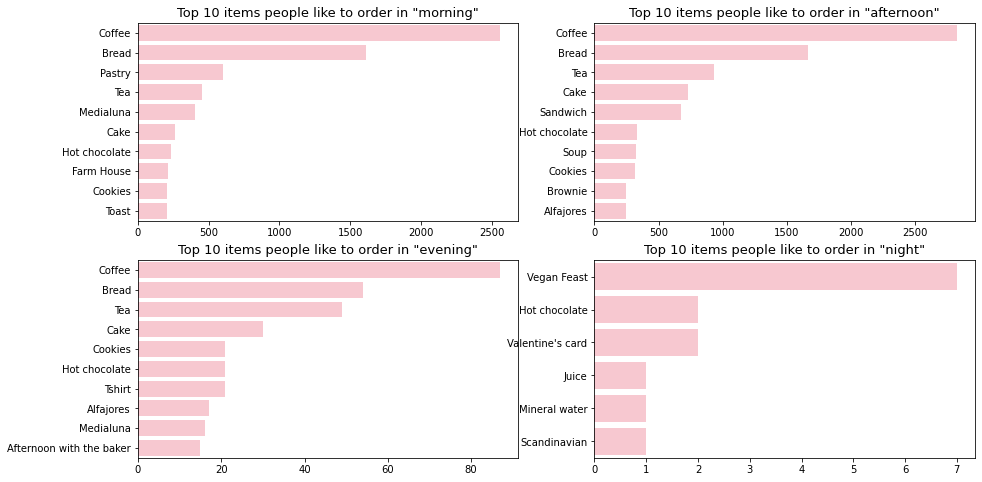

In [81]:
ata = df.groupby(['period_day','Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day = ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i,j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction, color='pink')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

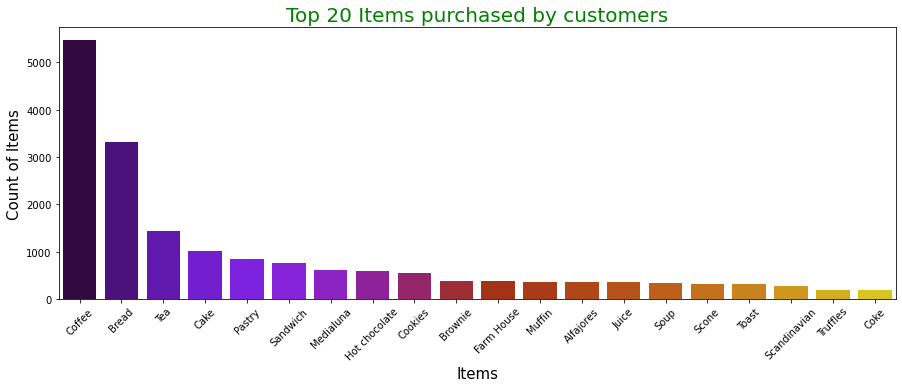

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()


In [21]:
products = df['Item'].nunique()
print(products)

94


## No. of unique products ordered

In [22]:
products_group = df[['Item','Transaction']].groupby('Item').count().sort_values('Transaction',axis=0,ascending = "False")

In [23]:
products_group.head(20)

,Transaction
Item,
Adjustment,1
Olum & polenta,1
Polenta,1
Bacon,1
Gift voucher,1
The BART,1
Raw bars,1
Chicken sand,1
Siblings,2


In [24]:
products_group.nunique()

Transaction    57
dtype: int64

In [25]:
df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [26]:
df['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Raw bars             1
Adjustment           1
Gift voucher         1
Bacon                1
Olum & polenta       1
Name: Item, Length: 94, dtype: int64

In [27]:
data = df[df['Item']=='Coffee'].head() 


## Annual Transactions

In [28]:
df.groupby(['Year'])['Transaction'].sum()


Year
2016    16460090
2017    85586892
Name: Transaction, dtype: int64

In [29]:
df.groupby(['Month_Year'])['Transaction'].sum()


Month_Year
2016-01      230920
2016-02      303335
2016-03      556608
2016-04      405192
2016-05      471465
2016-06      434982
2016-07      338660
2016-08      309698
2016-09      422946
2016-10      663523
2016-11     4595265
2016-12     7727496
2017-01    15389842
2017-02    17346512
2017-03    23635456
2017-04     5076641
2017-05     3722705
2017-06     3031087
2017-07     3330463
2017-08     3660096
2017-09     2616119
2017-10     2318728
2017-11     3228497
2017-12     2230746
Freq: M, Name: Transaction, dtype: int64

# Bread Basket market analysis using Apriori Algorithm

In [30]:
df 

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,hour,Month_Year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016,10,9,2016-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016,10,10,2016-10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016,10,10,2016-10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016,10,10,2016-10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016,10,10,2016-10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:00,afternoon,weekend,2017,9,14,2017-09
20503,9682,Tea,2017-09-04 14:32:00,afternoon,weekend,2017,9,14,2017-09
20504,9683,Coffee,2017-09-04 14:57:00,afternoon,weekend,2017,9,14,2017-09
20505,9683,Pastry,2017-09-04 14:57:00,afternoon,weekend,2017,9,14,2017-09


In [31]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,Year,Month,hour,Month_Year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016,10,9,2016-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016,10,10,2016-10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016,10,10,2016-10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016,10,10,2016-10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016,10,10,2016-10


In [59]:
basket = df.groupby(['Transaction','Item'])['Transaction'].sum().unstack().fillna(0)
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9681.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
basket_model = basket.applymap(lambda x: 1 if x>0 else 0)

basket_model

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# In this case we set 'min_support' on 0,01

In [66]:
popular_sets = apriori(basket_model, min_support=0.01, use_colnames=True)

popular_sets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Coffee, Cake, Bread)"
59,0.011199,"(Pastry, Coffee, Bread)"


In [67]:
rules = association_rules(popular_sets,metric='lift',min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
3,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [69]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [74]:
rules[ (rules['lift']>=1) &
       (rules['confidence']>=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
15,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


# Recomendations

In [76]:
rules['antecedents'][15]

frozenset({'Hot chocolate'})

In [78]:
basket_model['Coffee'].sum()

4528

In [79]:
basket_model['Alfajores'].sum()

344

In [80]:
basket_model['Hot chocolate'].sum()

552

# The Result:  the coffee being the consequents as  most succesful in selling  item and frequent purchased with Alfajores,cake etc..,